In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nTarget Value Counts:")
print(df['y'].value_counts())


Dataset Shape: (45211, 17)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Dataset Description:
                age        bal

In [20]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('y_yes', axis=1)  
y = df_encoded['y_yes']

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

Feature Shape: (45211, 42)
Target Shape: (45211,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (36168, 42)
Testing set: (9043, 42)


In [15]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [16]:
y_pred = clf.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8948357845847617

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      7952
        True       0.63      0.31      0.41      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.64      0.68      9043
weighted avg       0.88      0.89      0.88      9043


Confusion Matrix:
 [[7759  193]
 [ 758  333]]


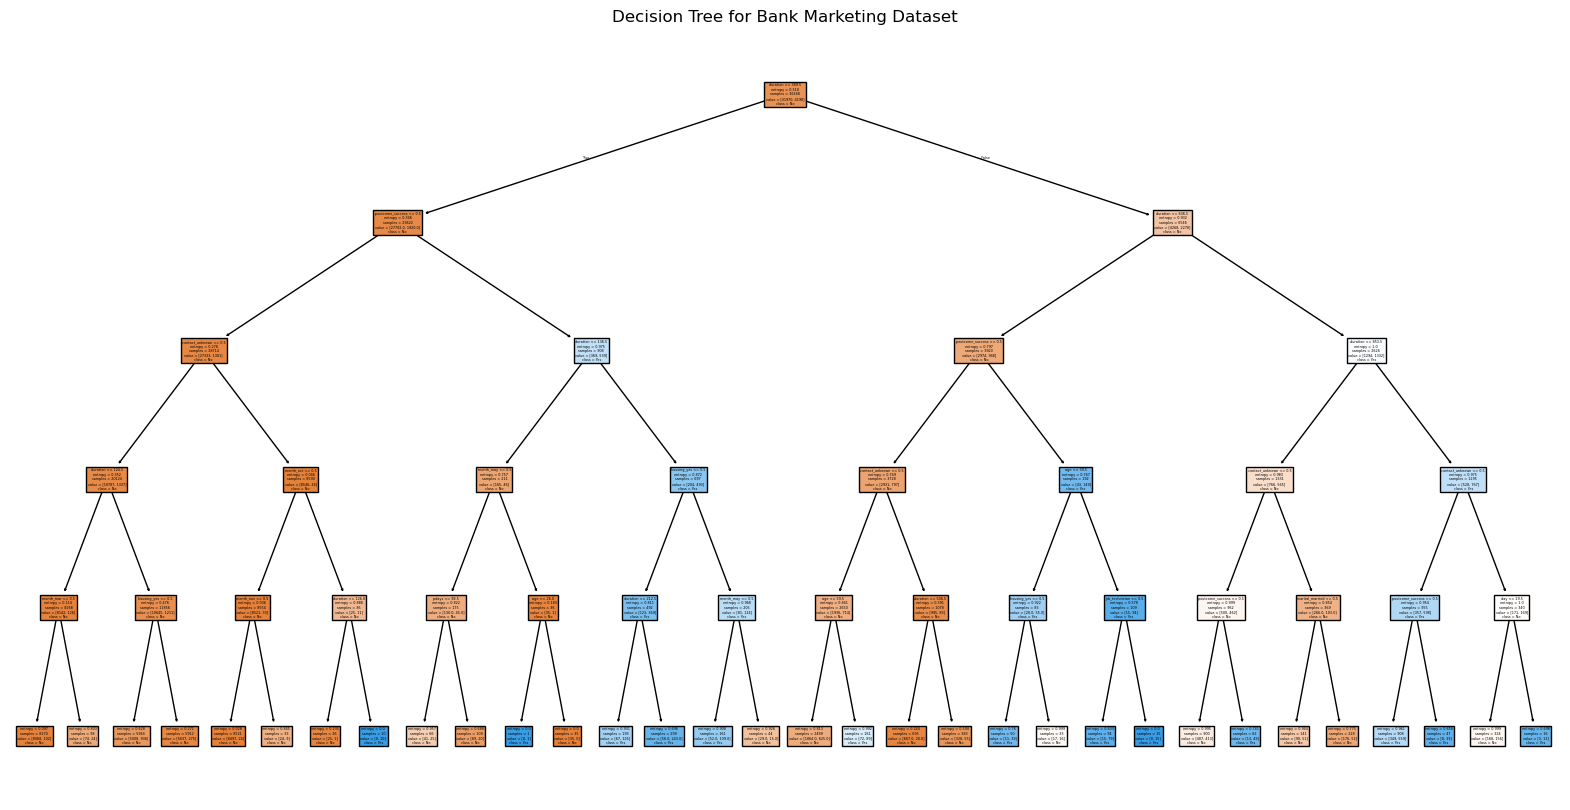

In [22]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No','Yes'])
plt.title("Decision Tree for Bank Marketing Dataset")
plt.show()

In [18]:

print("The Decision Tree classifier can predict whether a customer will purchase a product or service based on demographic and behavioral data. Adjusting the tree depth or other hyperparameters can improve performance further.")


The Decision Tree classifier can predict whether a customer will purchase a product or service based on demographic and behavioral data. Adjusting the tree depth or other hyperparameters can improve performance further.
